# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

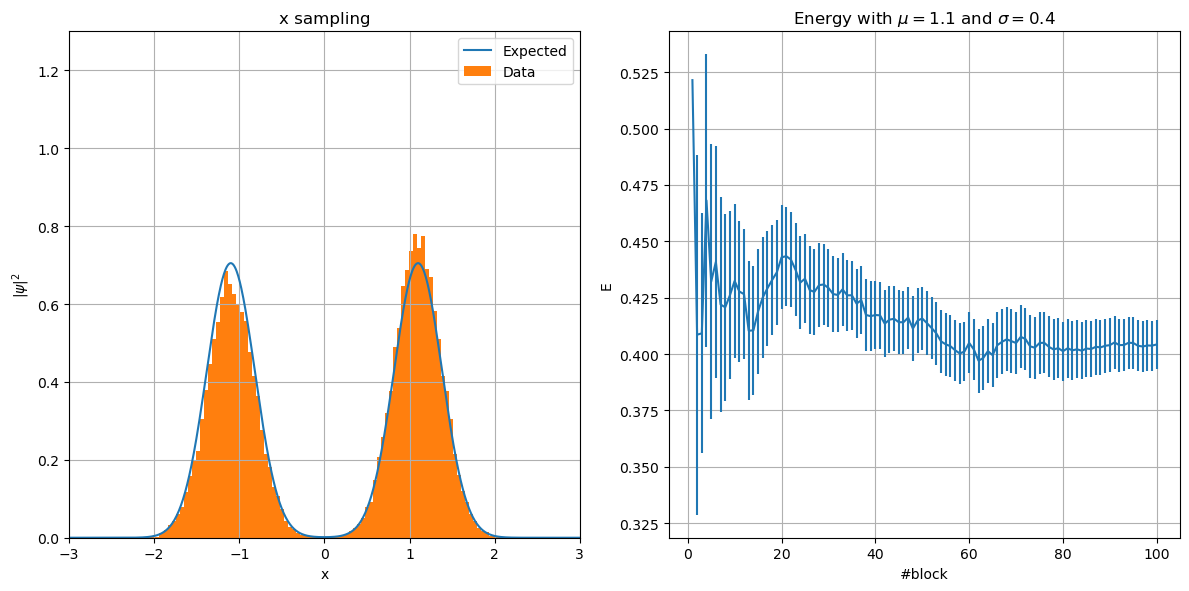

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 

# Definizione di x
x = np.linspace(-3, 3, 1000)

# Definizione dei parametri
mu = 1.1
sigma = 0.4

def psi(x,mu,sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) + np.exp(-(x + mu)**2 / (2 * sigma**2))

norm = np.sqrt(np.sqrt(math.pi * sigma**2) * 2*(1 + np.exp(-mu**2/sigma**2)))

psi2 = psi(x,mu,sigma)**2/norm**2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('x sampling')
plt.plot(x, psi2, label="Expected") 
data = np.loadtxt('metro_x.txt')
plt.hist(data, bins=100, density=True, label="Data")
plt.xlabel("x")
plt.ylabel("$|\psi|^2$")
plt.grid(True)
plt.legend()
plt.xlim((-3, 3))
plt.ylim((0, 1.3))

plt.tight_layout()

plt.subplot(1, 2, 2)
data_en_min = np.loadtxt('metro_energy.txt')
nblock = data_en_min[:,0]
energy = data_en_min[:,1]
error = data_en_min[:,2]

plt.errorbar(nblock,energy,yerr=error)
plt.title('Energy with $\mu = 1.1 $ and $\sigma = 0.4$')
plt.xlabel('#block')
plt.ylabel('E')
plt.grid(True)
plt.subplots_adjust(wspace=0.175)
plt.show()

Il grafico di sinistra serve a verificare che la distribuzione campionata tramite il Metropolis sia effettivamente quella desiderata (ossai |psi|^2).

Lo scopo dell'esercizio è quello di determiare il valore dell'enegia a fissati valori di mu e sigma: tali valori sono stati fissati rispetivamente a 1.1 e 0.4.
L'energia viene calcolata sommando i contributi di energia potenziale e cinetica, valutati nei valori x estratti tramite l'algoritmo di Metropolis (tramite la funzione "avanza_linear") secondo la distribuzione di probabilità desiderata (|psi|^2).
La funzione "test_acceptance" è stata utilizzata per verificare che l'accettazione del Metropolis fosse attorno al 50 % e la larghezza della distribuzione uniforme utilizzata per estrarre i nuovi punti è stata regolata in modo che ciò si verificasse.

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

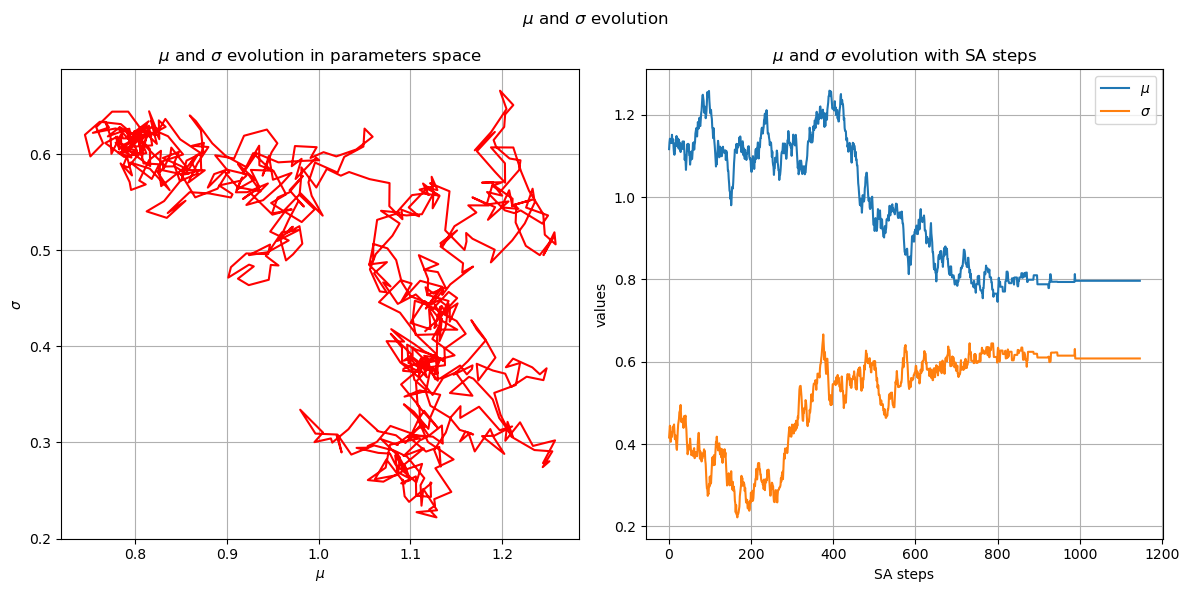

Best estimation of $\mu$ and $\sigma$: 
 $\mu$ = 0.796551 	 $\sigma$ = 0.60791


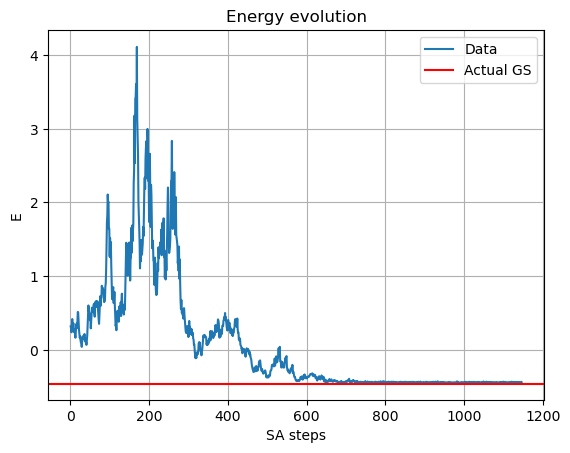


 Last energy value =  -0.439264


In [2]:
data_mu_sigma = np.loadtxt('mu_sigma.txt')
data_en = np.loadtxt('SA_energy.txt')

mu = data_mu_sigma[:,0]
sigma = data_mu_sigma[:,1]

step = data_en[:,0]
energy = data_en[:,1]

plt.figure(figsize=(12, 6))

# Primo subplot 
plt.subplot(1, 2, 1)
plt.plot(mu, sigma, color = "red")
plt.title('$\mu$ and $\sigma$ evolution in parameters space')
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.grid(True)

# Secondo subplot
plt.subplot(1, 2, 2)
step = [i+1 for i in range(len(mu))]
plt.plot(step, mu, label = "$\mu$")
plt.plot(step, sigma, label = "$\sigma$")
plt.title('$\mu$ and $\sigma$ evolution with SA steps')
plt.xlabel('SA steps')
plt.ylabel('values')
plt.grid(True)
plt.suptitle('$\mu$ and $\sigma$ evolution')
# Regola la larghezza dei subplot per farli uguali
plt.tight_layout()

plt.legend()
plt.show()


print('Best estimation of $\mu$ and $\sigma$: \n $\mu$ =', mu[-1], '\t $\sigma$ =', sigma[-1])



plt.plot(step, energy, label ="Data")
plt.axhline(y=-0.46046587969271513,color='red',label='Actual GS')
plt.title('Energy evolution')
plt.xlabel('SA steps')
plt.ylabel('E')
plt.grid(True)
plt.legend()
plt.show()


print('\n Last energy value = ',energy[-1])


Viene sfruttata la tecnica del "Simulated Annealing". Per fare ciò, si fissa una temperatura iniziale (pari a 10) ed una finale (pari a 0.0001) e si abbassa progressivamente la temperatura secondo un certo rate (pari a 0.99): "SA steps" indicano le varie temperature visitate.
Ad ogni temperatura corrispondono dei valori di mu e sigma, campionati tramite l'algoritmo di Metropolis; per determinare l'accettazione del capionamento di mu e sigma, è necassario valutare l'energia della nuova configurazione (quella vecchia viene, per questioni di efficienza, memorizzata dal codice e non ricalcolata ogni volta): ciò viene fatto tramite la funzione "energy" (che, sostanzialmente, funziona come il codice dell'esercizio 8.1, dal momento che calcola l'energia per mu e sigma fissati).
Nel codice è stata inclusa una funzione ("equilibration") che, chiamata in causa prima di calcolare l'energia (la funzione "energy"), effettua un'equilibrazione che ha lo scopo di regolare il parametro della larghezza della distribuzione uniforme (con cui, nell'effettuare il Metropolis, si campionano le x) in modo che l'accettazione sia compresa tra 40% e 60%.

Osservando gli andamenti di mu e sigma, si verifica che questi si stabilizzano (con qualche oscillazione) dopo circa 800 SA steps: a ciò consegue lo stabilizzarsi dell'energia (grafico "Energy evolution"). I valori poi si stabilizzano definitivamente dopo circa 1000 SA steps.

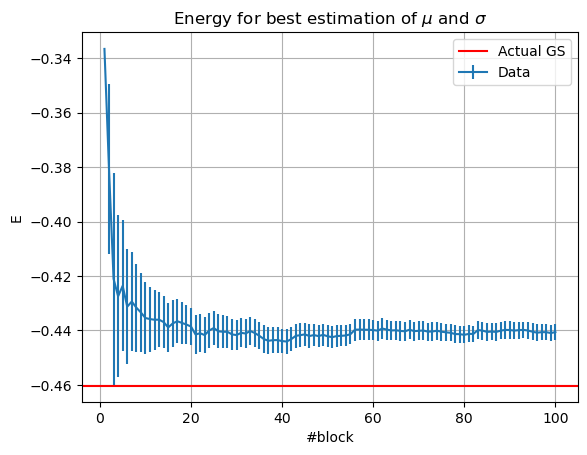

In [3]:
data_en_min = np.loadtxt('energy_min.txt')
nblock = data_en_min[:,0]
energy = data_en_min[:,1]
error = data_en_min[:,2]

plt.errorbar(nblock,energy,yerr=error,label="Data")
plt.axhline(y=-0.46046587969271513,color='red',label='Actual GS')
plt.title('Energy for best estimation of $\mu$ and $\sigma$')
plt.xlabel('#block')
plt.ylabel('E')
plt.legend()
plt.grid(True)

Nel grafico sopra, è presente il calcolo dell'energia calcolata con i valori di mu e sigma fissati alle migliori stime ottenute (le ultime). Ciò è stato fatto mediante la funzione "final".
Si verifica che l'energia campionata è leggermente sopra quella effettiva del GS. Tuttavia, questa è la miglor performance ottenibile a partire dal modello utilizzato.

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.46046587969259045


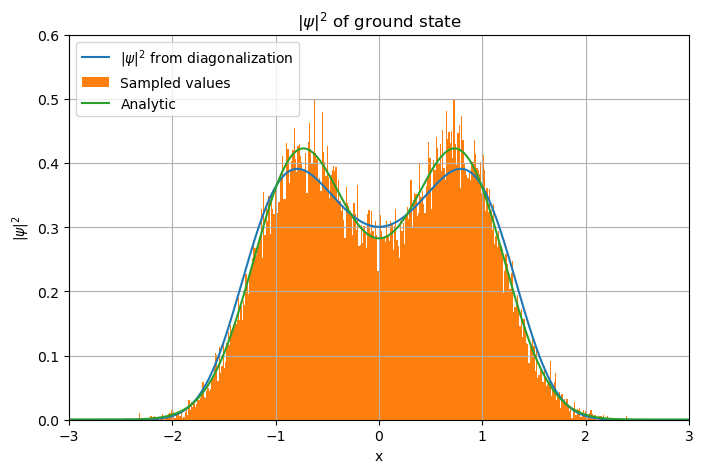

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

def psi_anal(x,mu,sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) + np.exp(-(x + mu)**2 / (2 * sigma**2))

norm = np.sqrt(np.sqrt(math.pi * sigma[-1]**2) * 2*(1 + np.exp(-mu[-1]**2/sigma[-1]**2)))

analytic = (psi_anal(x,mu[-1],sigma[-1])**2) / norm**2

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
#print("1st excited state energy: ", E[1])
#print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
#plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2,label="|$\psi|^2$ from diagonalization")
#plt.plot(x,(psi[1])**2)
#plt.plot(x,(psi[2])**2)
#plt.title("Potential & Probabilities")
plt.title("|$\psi|^2$ of ground state")
plt.xlabel("x")
plt.ylabel("|$\psi|^2$")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((0,0.6))

data = np.loadtxt('x_distribution.txt')
plt.hist(data, bins=400, density=True, label="Sampled values")

plt.plot(x,analytic,label="Analytic")

plt.legend()
plt.show()

Nel grafico sopra è riportato un istogramma (in arancione) che rappresenta i valori x campionati secondo la distribuzione di probabilità |psi^2| con i valori di mu e sigma fissati agli ultimi ottenuti. Questi dati sono stati anch'essi calcolati tramite la funzione "final", contestualente al calcolo dell'energia per massimizzare l'efficienza del codice.
In verde è rappresentata la distribuzione analitica ed in blu la distribuzione calcolata diagonalizzando l'equazione di Schrodinger.
Si verifica un'ottima compatibilità tra la distribuzione campionata e quella attesa (sia analitica sia ottenuta mediante la diagonalizzazione).